# Table of Content

1. [Clustering dengan KMeans](#clustering) <br>
2. [Classification](#classification) <br>
    2.1 [Liniear Discriminant Analysis](#LDA) <br>
    2.2 [Naive Bayes](#bayes) <br>
    2.3 [Decision Tree](#tree) <br>

# 1. Clustering dengan KMeans
<a id='clustering'></a>

In [1]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 2], 
              [1, 4], 
              [1, 0],
              [10, 2], 
              [10, 4], 
              [10, 0]])

In [3]:
type(X)

numpy.ndarray

In [4]:
X[:,0]

array([ 1,  1,  1, 10, 10, 10])

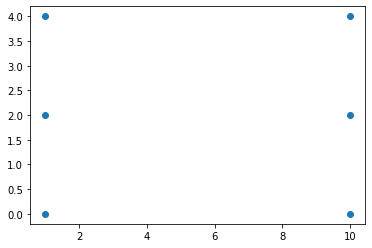

In [5]:
plt.scatter(X[:,0], X[:,1])

In [6]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

In [7]:
type(kmeans)

sklearn.cluster._kmeans.KMeans

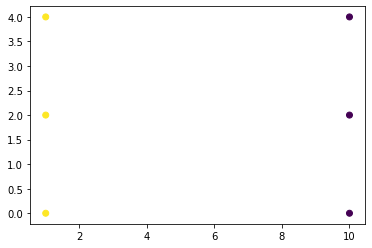

In [7]:
plt.scatter(X[:,0], X[:,1], c=list(kmeans.labels_))

In [9]:
X_test = np.array([[0, 0], [12, 3]])

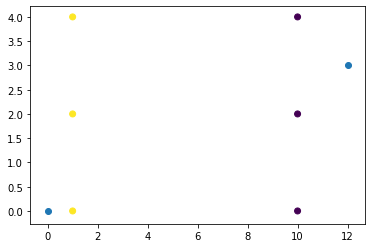

In [10]:
plt.scatter(X[:,0], X[:,1], c=list(kmeans.labels_))
plt.scatter(X_test[:,0], X_test[:,1])

In [11]:
cluster = kmeans.predict(X_test)

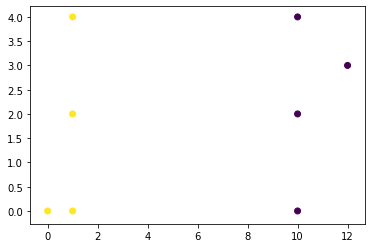

In [12]:
plt.scatter(X[:,0], X[:,1], c=list(kmeans.labels_))
plt.scatter(X_test[:,0], X_test[:,1], c=list(cluster))

# 2. Classification
<a id='classification'></a>

## 2.1 Liniear Discriminant Analysis
<a id='LDA'></a>

In [16]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [11]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([1, 1, 1, 2, 2, 2])

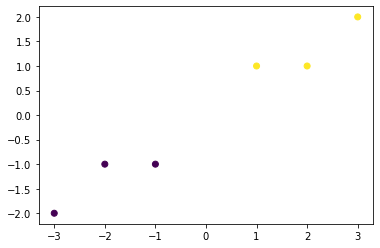

In [12]:
plt.scatter(X[:,0], X[:,1], c=y)

In [13]:
X_test = np.array([[0, -0.1]])

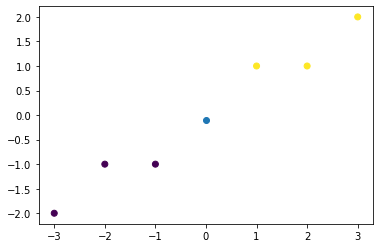

In [14]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.scatter(X_test[:,0], X_test[:,1])

In [17]:
clf = LinearDiscriminantAnalysis()
clf.fit(X, y)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [18]:
result = clf.predict(X_test)

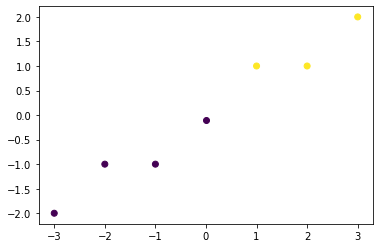

In [19]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.scatter(X_test[:,0], X_test[:,1], c=result)

## 2.2 Naive Bayes
<a id='bayes'></a>

In [13]:
import pandas as pd

from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder

In [14]:
df = pd.read_csv('Example1.csv')

In [15]:
df

,No,Status Nikah,Pendapatan,Memiliki Rumah
0,1,Belum Menikah,125,Tidak
1,2,Menikah,100,Tidak
2,3,Belum Menikah,70,Tidak
3,4,Menikah,120,Tidak
4,5,Cerai,95,Ya
5,6,Menikah,60,Tidak
6,7,Cerai,220,Tidak
7,8,Belum Menikah,85,Ya
8,9,Menikah,75,Tidak
9,10,Belum Menikah,90,Ya


In [16]:
le = LabelEncoder()

In [17]:
df['Status Nikah'] = df[['Status Nikah']].apply(le.fit_transform)

In [18]:
df

,No,Status Nikah,Pendapatan,Memiliki Rumah
0,1,0,125,Tidak
1,2,2,100,Tidak
2,3,0,70,Tidak
3,4,2,120,Tidak
4,5,1,95,Ya
5,6,2,60,Tidak
6,7,1,220,Tidak
7,8,0,85,Ya
8,9,2,75,Tidak
9,10,0,90,Ya


In [19]:
X = df.drop(columns=['No', 'Memiliki Rumah'])
y = df['Memiliki Rumah']

In [20]:
X

,Status Nikah,Pendapatan
0,0,125
1,2,100
2,0,70
3,2,120
4,1,95
5,2,60
6,1,220
7,0,85
8,2,75
9,0,90


In [21]:
y

0    Tidak
1    Tidak
2    Tidak
3    Tidak
4       Ya
5    Tidak
6    Tidak
7       Ya
8    Tidak
9       Ya
Name: Memiliki Rumah, dtype: object

In [22]:
gnb = GaussianNB()
y_pred = gnb.fit(X, y)

In [23]:
A = [['Cerai', 125]]

In [24]:
A[0][0]=le.transform([A[0][0]])[0]

In [25]:
A

[[1, 125]]

In [26]:
gnb.predict(A)

array(['Tidak'], dtype='<U5')

## 2.3 Decision Tree
<a id='tree'></a>

In [34]:
df = pd.read_csv('Example2.csv')

In [35]:
df

,Umur,Pendapatan,Pelajar,Credit Rating,Membeli Komputer
0,Muda,Tinggi,Tidak,Fair,Tidak
1,Muda,Tinggi,Tidak,Excellent,Tidak
2,Paruhbaya,Tinggi,Tidak,Fair,Ya
3,Tua,Menengah,Tidak,Fair,Ya
4,Tua,Rendah,Ya,Fair,Ya
5,Tua,Rendah,Ya,Excellent,Tidak
6,Paruhbaya,Rendah,Ya,Excellent,Ya
7,Muda,Menengah,Tidak,Fair,Tidak
8,Muda,Rendah,Ya,Fair,Ya
9,Tua,Menengah,Ya,Fair,Ya


In [36]:
le = LabelEncoder()
df = df[df.columns[:]].apply(le.fit_transform)

In [37]:
df

,Umur,Pendapatan,Pelajar,Credit Rating,Membeli Komputer
0,0,2,0,1,0
1,0,2,0,0,0
2,1,2,0,1,1
3,2,0,0,1,1
4,2,1,1,1,1
5,2,1,1,0,0
6,1,1,1,0,1
7,0,0,0,1,0
8,0,1,1,1,1
9,2,0,1,1,1


In [38]:
X = df.drop(columns=['Membeli Komputer'])
y = df['Membeli Komputer']

In [39]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

In [40]:
A = [0, 0, 1, 1]

In [41]:
clf.predict([A])

array([1])